# Plotting Acoustic Doppler Current Profiler (ADCP) data

## Today we'll plot our collected ADCP data on the map that we created in last class!

**In this class we will continue will Xarray dataframe package!** 
<br><br>
Xarray is a package beloved by many for dealing with three+ dimensional data. It is similar to pandas in that it organizes our data in a neat and efficient way. While `pandas` is great for "tabular" data (think, something that you could put in an excel sheet) `xarray` is great for gridded data and building multi-dimensional data "cubes". Nerd-out on xarray facts here: https://docs.xarray.dev/en/stable/?

In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import datetime
import struct
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs #ccrs stands for cartopy coordinate reference system
import cartopy.feature as cfeature

In [24]:
import cmocean as cmo

**We have discussed functions, where you can store a piece of code that does a task inside of a defined block. Remember we did define a function while we were plotting density line contour! We will now go through how you can load functions from other files and use them in your code. And this file where you are importing the function called module.** 
<br><br>
In the file, ADCP_WINRIVER_v1.py there are several functions defined. Because we have this Jupyter notebook in the same folder as that .py, we can load those functions by simply doing the following:

In [19]:
# importing read_PD0 function from ADCP_WINRIVER_v1 module.

from ADCP_WINRIVER_v1 import read_PD0

## ADCPs collect data in a proprietary binary format called a ```.PD0```, now let's load a few example ```.PD0s``` using the function we just loaded

In [20]:
##########################################
##         To load a single file        ##
##########################################

file0 = 'Raritan_PM_329_0_000.PD0'
upriver = read_PD0(file0)

file1 = 'Raritan_PM_329_0_001.PD0'
midriver = read_PD0(file1)

file2 = 'Raritan_PM_329_0_002.PD0'
rivermouth = read_PD0(file2)

file3 = 'Raritan_PM_329_0_003.PD0'
baymouth = read_PD0(file3)

upriver


Reading PDO file : Raritan_PM_329_0_000.PD0
Reading PDO file : Raritan_PM_329_0_001.PD0
Reading PDO file : Raritan_PM_329_0_002.PD0
Reading PDO file : Raritan_PM_329_0_003.PD0


<xarray.Dataset>
Dimensions:     (depth_cell: 37, time: 996)
Coordinates:
  * depth_cell  (depth_cell) float64 0.61 0.86 1.11 1.36 ... 8.86 9.11 9.36 9.61
  * time        (time) datetime64[ns] 2019-03-29T16:51:28 ... 2019-03-29T17:0...
Data variables: (12/20)
    c1          (depth_cell, time) float64 173.0 151.0 175.0 ... 104.0 109.0
    c2          (depth_cell, time) float64 163.0 152.0 137.0 ... 101.0 100.0
    c3          (depth_cell, time) float64 163.0 153.0 171.0 ... 111.0 105.0
    c4          (depth_cell, time) float64 145.0 156.0 147.0 ... 108.0 105.0
    ei1         (depth_cell, time) float64 114.0 139.0 108.0 ... 89.0 76.0 89.0
    ei2         (depth_cell, time) float64 119.0 106.0 145.0 ... 125.0 126.0
    ...          ...
    depth       (time) float64 3.488 3.495 3.51 3.5 ... 2.982 2.982 2.97 2.995
    heading     (time) float64 86.04 85.64 86.33 86.23 ... 50.07 49.92 49.77
    lat         (time) float64 40.49 40.49 40.49 40.49 ... 40.49 40.49 40.49
    lon         (time) float64 -74.41 -74.41 -74.41 ... -74.41 -74.41 -74.41
    pitch       (time) float64 -0.1 0.0 -0.03 -0.02 ... 0.59 0.68 0.66 0.73
    roll        (time) float64 -2.22 -2.27 -2.27 -2.46 ... 0.03 0.02 -0.01 0.02
Attributes:
    description:  Processed ADCP data from Raritan_PM_329_0_000.PD0

Notice how our dataset `ds` has both dimensions and coordinates. These will come in handy! Lets make a plot to visualize the data we have here. We can use dot indexing to index variables within our dataset. Using the `.plot` function on our xarray dataset, we can plot the `u` variable (east/west velocity) in just a SINGLE of code. The default `.plot` will plot the indicated variable against the dimensions of the dataset. It will even label your axes for you!

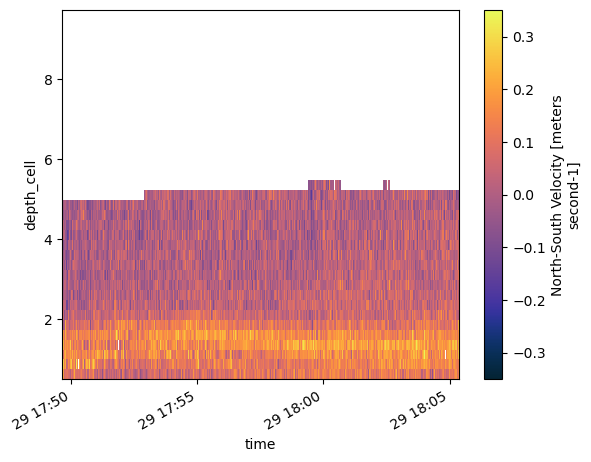

In [27]:
midriver.v.plot(cmap=cmo.cm.thermal)

In [29]:
# Let's find out how many colour map options we have.

cmo.cm.cmapnames

['thermal',
 'haline',
 'solar',
 'ice',
 'gray',
 'oxy',
 'deep',
 'dense',
 'algae',
 'matter',
 'turbid',
 'speed',
 'amp',
 'tempo',
 'rain',
 'phase',
 'topo',
 'balance',
 'delta',
 'curl',
 'diff',
 'tarn']

If we want to make the plot a bit prettier, we can do:

(3.0, 1.0)

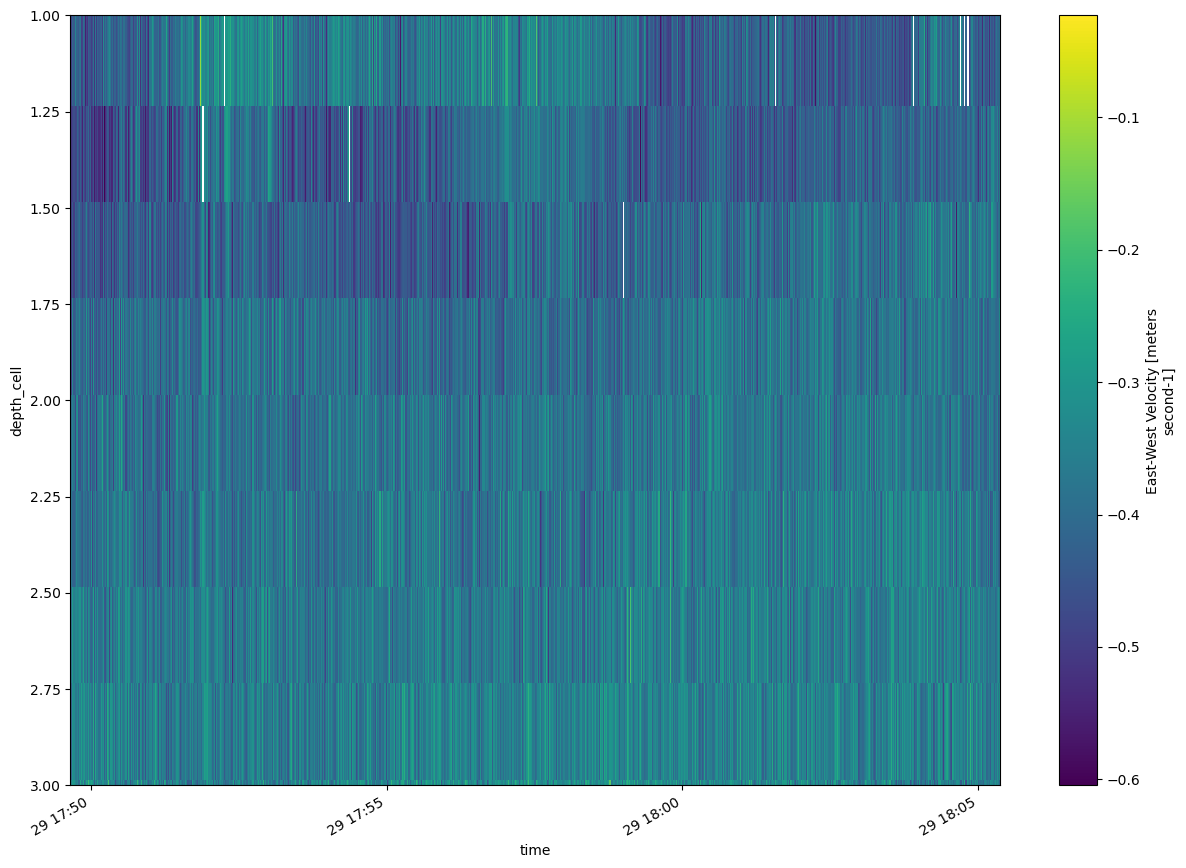

In [36]:
plt.figure(figsize=(15,10)) # open a figure object

# plt.contourf(midriver.time, midriver.depth_cell, midriver.u, cmap='RdBu_r')

midriver.u.plot() # draw inside that figure space

ax = plt.gca() 
ax.set_ylim(3,1)

## Let's find out where in the world we collected this data..... that might be important

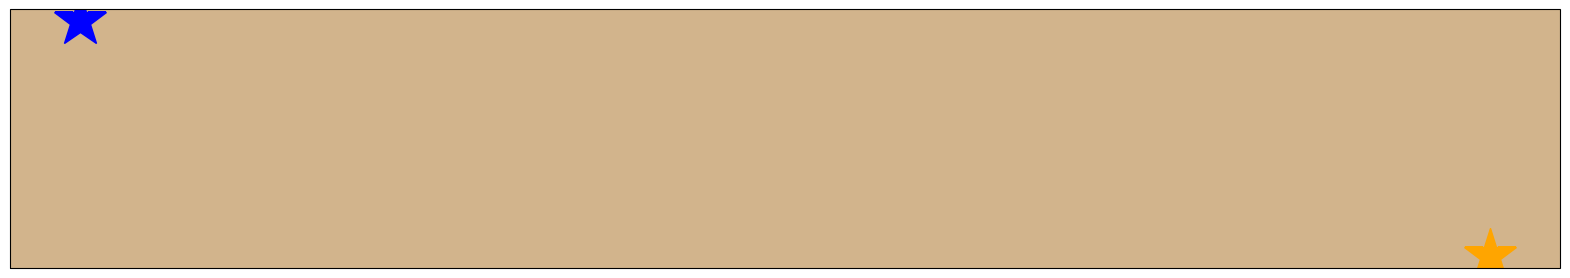

In [41]:
plt.figure(figsize=(20,10))

# 'Mercator' represents lat and lon on a cylindrical projection.
proj = ccrs.Mercator()

# PlateCarree is the projection that your xarray is currently on.
data_crs = ccrs.PlateCarree()

# create plot with the 'Mercator' projection
ax = plt.subplot(projection = proj)

## We're just plotting ONE of the latitude and longitude points because this example is from when the boat was stationary.
# Also remember that we need to specify which projection the data is coming from and what projection I want to project!
ax.plot(upriver.lon[0], upriver.lat[0], '*',transform = data_crs, markersize=40, label='upriver',color='blue') 


ax.plot(midriver.lon[0], midriver.lat[0], '*',transform = data_crs,markersize=40,label='midriver',color='orange') 

plt.xticks(rotation=45) #set the orientation of the xticks

ax.coastlines()
ax.add_feature( cfeature.LAND, color='tan' )


## That's not super informative so let's fix the zoom with ```ax.set_extent()```

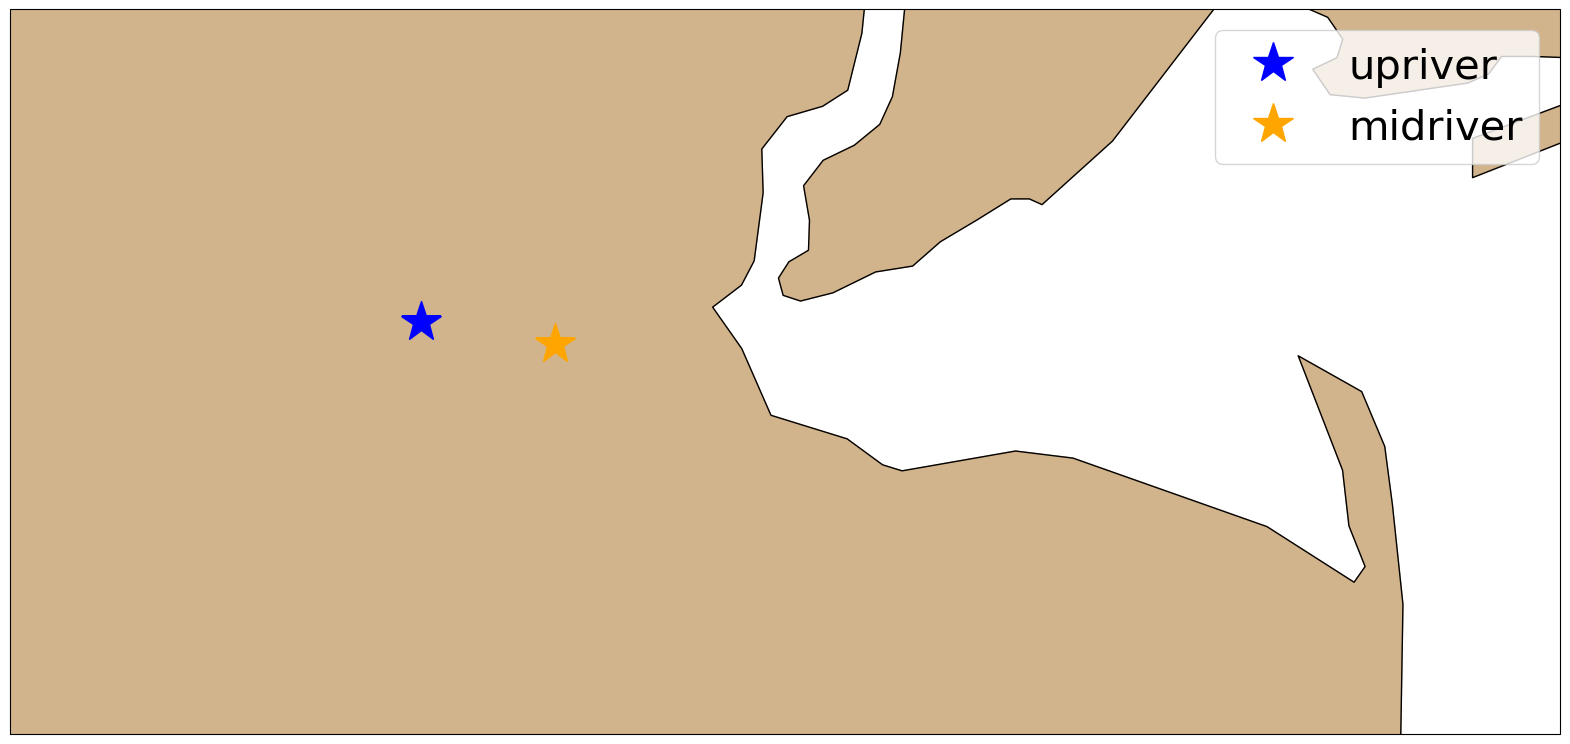

In [44]:
plt.figure(figsize=(20,10))

# 'Mercator' projection
proj = ccrs.Mercator()

# PlateCarree is the projection that your xarray is currently on
data_crs = ccrs.PlateCarree()

# create plot with the 'Mercator' projection
ax = plt.subplot(projection = proj)

## We're just plotting ONE of the latitude and longitude points because this example is from when the boat was stationary
plt.plot(upriver.lon[0], upriver.lat[0], '*',transform = data_crs,markersize=30,label='upriver',color='blue') # need to "transform" data from PlateCaree to Mercator
plt.plot(midriver.lon[0], midriver.lat[0], '*',transform = data_crs,markersize=30,label='midriver',color='orange') # need to "transform" data from PlateCaree to Mercator

plt.xticks(rotation=45)

ax.coastlines()
ax.add_feature( cfeature.LAND, color='tan' )

## Zoom in!
ax.set_extent([-74.6, -73.9, 40.35, 40.6])
plt.legend()
plt.rc('legend',fontsize=30) # using a size in points


Cool, so this data was collect just inside Raritan Bay. That piece of land sticking out to the East is Sandy Hook for reference. Why don't we also add the upstream waters of the Raritan River that Cartopy does not do a good job of capturing. So, let's upload the river data that we used in the last class!

In [45]:
## Load dataset. The data is located here but we have it downloaded locally for simplicity: https://tds.marine.rutgers.edu/erddap/griddap/RARITAN_ELEVATION.graph
raritan = xr.open_dataset('../week_3_Mapping_in_Python_export/RARITAN_ELEVATION_f453_6caa_d736.nc')
raritan

<xarray.Dataset>
Dimensions:    (longitude: 2231, latitude: 2001)
Coordinates:
  * longitude  (longitude) float32 -74.56 -74.56 -74.56 ... -74.27 -74.27 -74.27
  * latitude   (latitude) float32 40.4 40.4 40.4 40.4 ... 40.6 40.6 40.6 40.6
Data variables:
    z          (longitude, latitude) float64 ...
Attributes: (12/26)
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    defaultGraphQuery:         z&.draw=surface&.vars=lon,lat,z
    Easternmost_Easting:       -74.2701
    geospatial_lat_max:        40.6
    geospatial_lat_min:        40.4
    ...                        ...
    standard_name_vocabulary:  CF Standard Name Table v29
    Summary:                   This is a synthesized elevation dataset of the...
    summary:                   This is a synthesized elevation dataset of the...
    Title:                     Rartian River Basin Elevation Data.
    title:                     Rartian River Basin Elevation Data.
    Westernmost_Easting:       -74.56

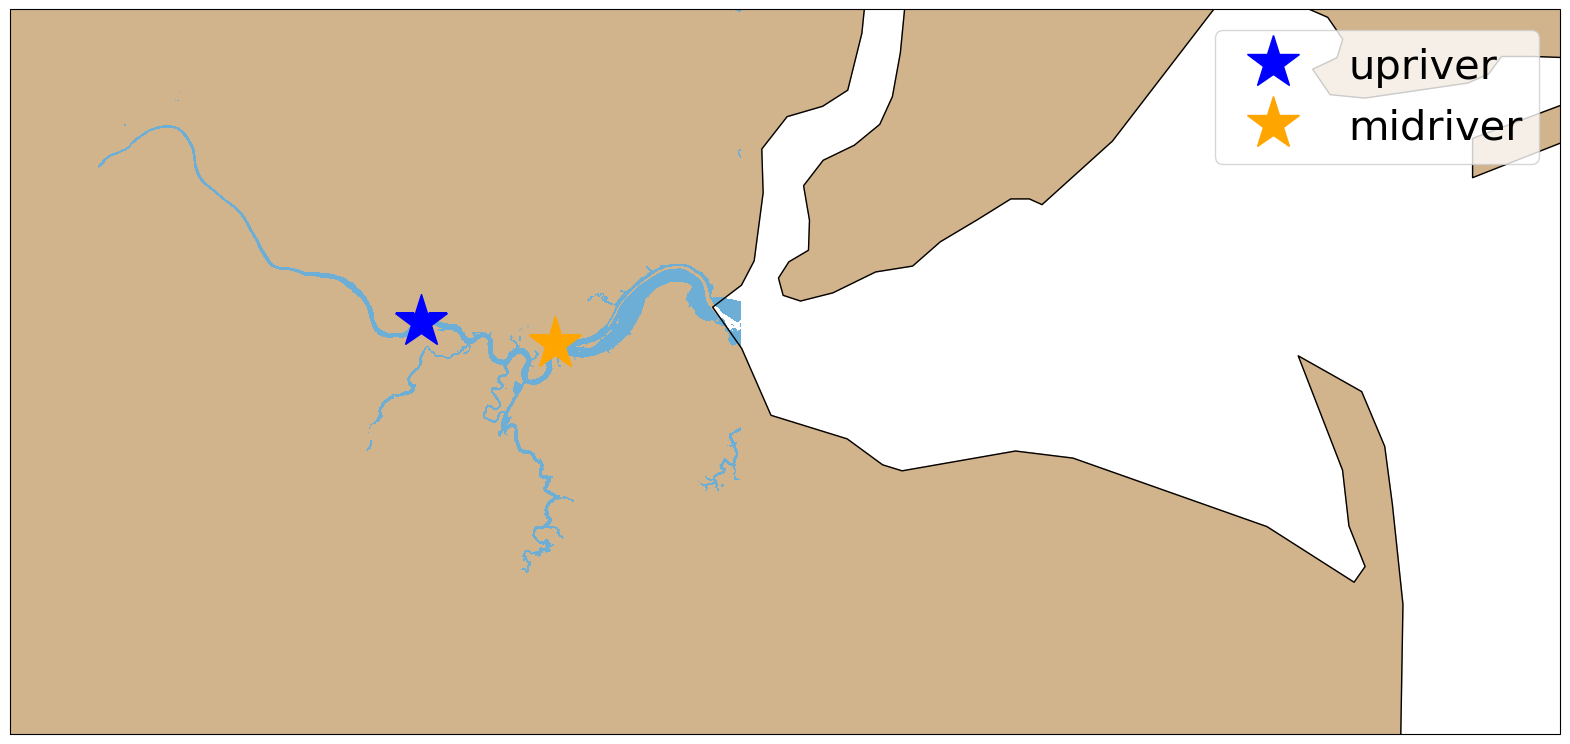

In [46]:
plt.figure(figsize=(20,10))

# Mercator is a projection of a map of the world on to a cylinder in such a way that all the parallels of latitude have the same length as the equator.
proj = ccrs.Mercator()

# PlateCarree is the projection that your xarray is currently on
data_crs = ccrs.PlateCarree()
# create plot with the 'Mercator' projection
ax = plt.subplot(projection = proj)

## We're just plotting ONE of the latitude and longitude points because this example is from when the boat was stationary
plt.plot(upriver.lon[0], upriver.lat[0], '*',transform = data_crs,markersize=40,label='upriver',color='blue') # need to "transform" data from PlateCaree to Mercator
plt.plot(midriver.lon[0], midriver.lat[0], '*',transform = data_crs,markersize=40,label='midriver',color='orange') # need to "transform" data from PlateCaree to Mercator

plt.xticks(rotation=45)

ax.coastlines()
ax.add_feature( cfeature.LAND, color='tan' )

## Zoom in!
ax.set_extent([-74.6, -73.9, 40.35, 40.6])
plt.legend()
plt.rc('legend',fontsize=30) # using a size in points


## Don't forget your zorder parameter!
dpth_contours = [-5,0]
bathy = plt.contourf(raritan.longitude, raritan.latitude,raritan.z.transpose(),transform=ccrs.PlateCarree(), 
                     cmap='Blues_r', levels=dpth_contours,zorder=0)



Much better!

## Now let's generate a mean velocity profile because the ship was stationary for this deployments

In [48]:
## u & v are 2D so we need to specify the dimension to take the mean over.
# upriver is a xarray DataArray and it has inbuilt methods just liker plot mehtod that you already have seen!

mean_u_upriver = upriver.u.mean(axis=1)
mean_v_upriver = upriver.v.mean(axis=1)

mean_u_midriver = midriver.u.mean(dim='time')
mean_v_midriver = midriver.v.mean(dim='time')


## Plot it up!

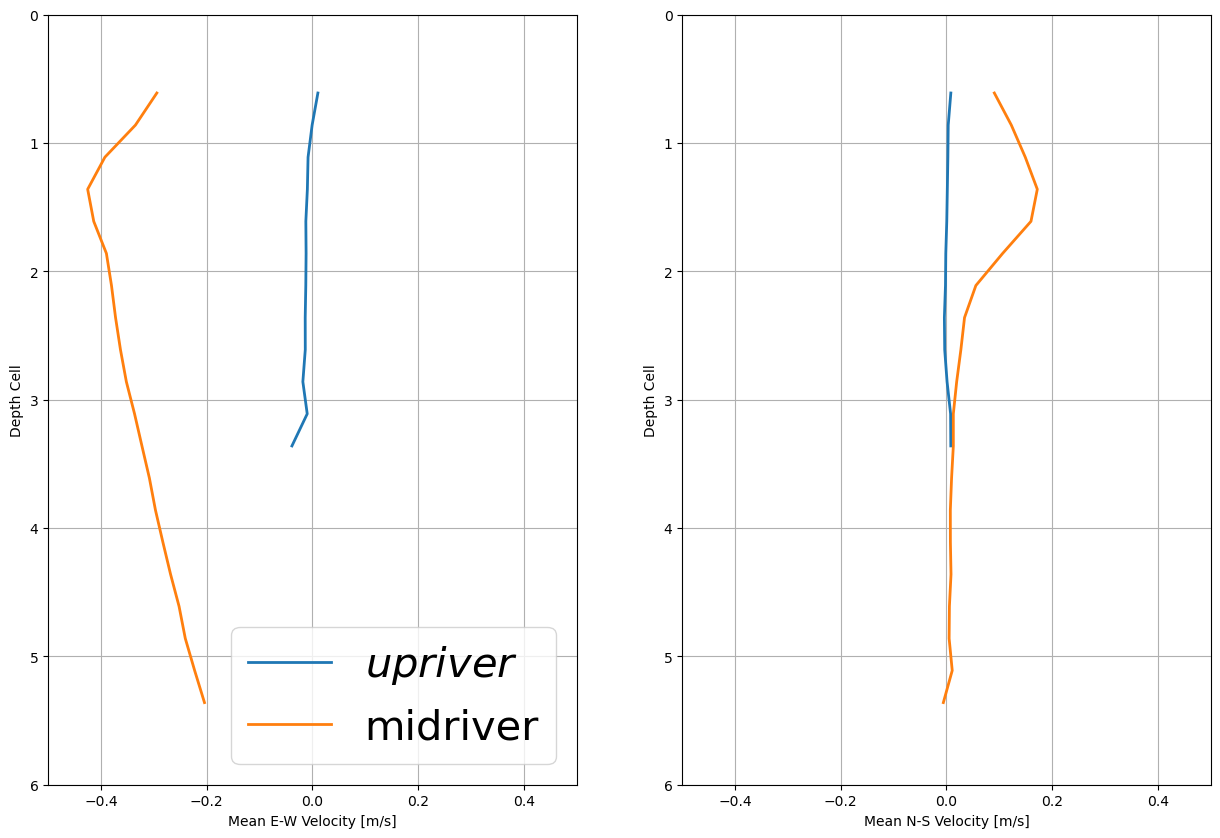

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

ax[0].plot(mean_u_upriver,upriver.depth_cell, linewidth=2, label=r'$upriver$')
ax[0].plot(mean_u_midriver,midriver.depth_cell, linewidth=2, label='midriver')
ax[0].set_ylim(6,0)
ax[0].set_xlim(-0.5,0.5)
ax[0].set_ylabel('Depth Cell')
ax[0].set_xlabel('Mean E-W Velocity [m/s]')
ax[0].legend(loc='lower right')
ax[0].grid()

ax[1].plot(mean_v_upriver,upriver.depth_cell, linewidth=2, label='upriver')
ax[1].plot(mean_v_midriver,midriver.depth_cell, linewidth=2, label='midriver')
ax[1].set_ylim(6,0)
ax[1].set_xlim(-0.5,0.5)
ax[1].set_ylabel('Depth Cell')
ax[1].set_xlabel('Mean N-S Velocity [m/s]')
ax[1].grid()

## Now we can also take a *depth* average for the velocity

In [53]:
## u & v are 2D so we need to specify the dimension to take the mean over
da_u_upriver = upriver.u.mean(axis=0)
da_v_upriver = upriver.v.mean(axis=0)

da_u_midriver = midriver.u.mean(axis=0)
da_v_midriver = midriver.v.mean(axis=0)


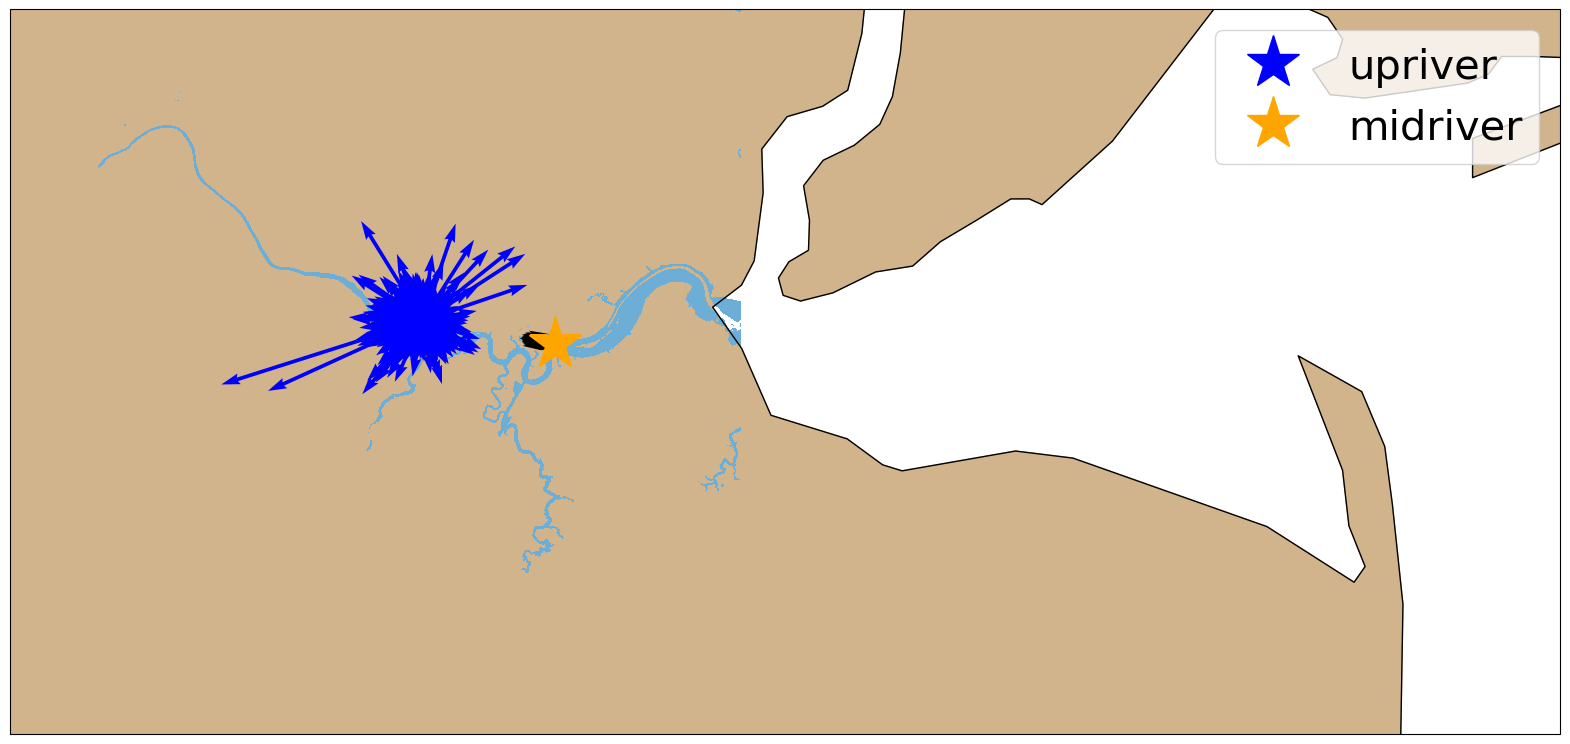

In [56]:
plt.figure(figsize=(20,10))


proj = ccrs.Mercator()

# PlateCarree is the projection that your xarray is currently on
data_crs = ccrs.PlateCarree()

# create plot with the 'Mercator' projection
ax = plt.subplot(projection = proj)

## We're just plotting ONE of the latitude and longitude points because this example is from when the boat was stationary
ax.plot(upriver.lon[0], upriver.lat[0], '*',transform = data_crs,markersize=40,label='upriver',color='blue') # need to "transform" data from PlateCaree to Mercator
ax.plot(midriver.lon[0], midriver.lat[0], '*',transform = data_crs,markersize=40,label='midriver',color='orange') # need to "transform" data from PlateCaree to Mercator

plt.xticks(rotation=45)

ax.coastlines()
ax.add_feature( cfeature.LAND, color='tan' )

## Zoom in!
ax.set_extent([-74.6, -73.9, 40.35, 40.6])
ax.legend()

plt.rc('legend',fontsize=20) # using a size in points

dpth_contours = [-5,0]
bathy = ax.contourf(raritan.longitude, raritan.latitude,raritan.z.transpose(),transform=ccrs.PlateCarree(), 
                     cmap='Blues_r', levels=dpth_contours,zorder=0)

# To plot vectors on your plot there is a differet function in pyplot module named quiver()

ax.quiver(upriver.lon.values,upriver.lat.values,da_u_upriver.values,da_v_upriver.values,transform=ccrs.PlateCarree(),color='blue', scale_units='inches')
ax.quiver(midriver.lon.values,midriver.lat.values,da_u_midriver.values,da_v_midriver.values,transform=ccrs.PlateCarree(),color='black', scale_units='inches')



## Okay that's kind of chaos. Let's just take a mean of our depth averaged currents and plot just that one vector

In [62]:
## u & v are 2D so we need to specify the dimension to take the mean over
da_u_upriver = (upriver.u.mean()).values
da_v_upriver = (upriver.v.mean()).values

da_u_midriver = (midriver.u.mean()).values
da_v_midriver = (midriver.v.mean()).values

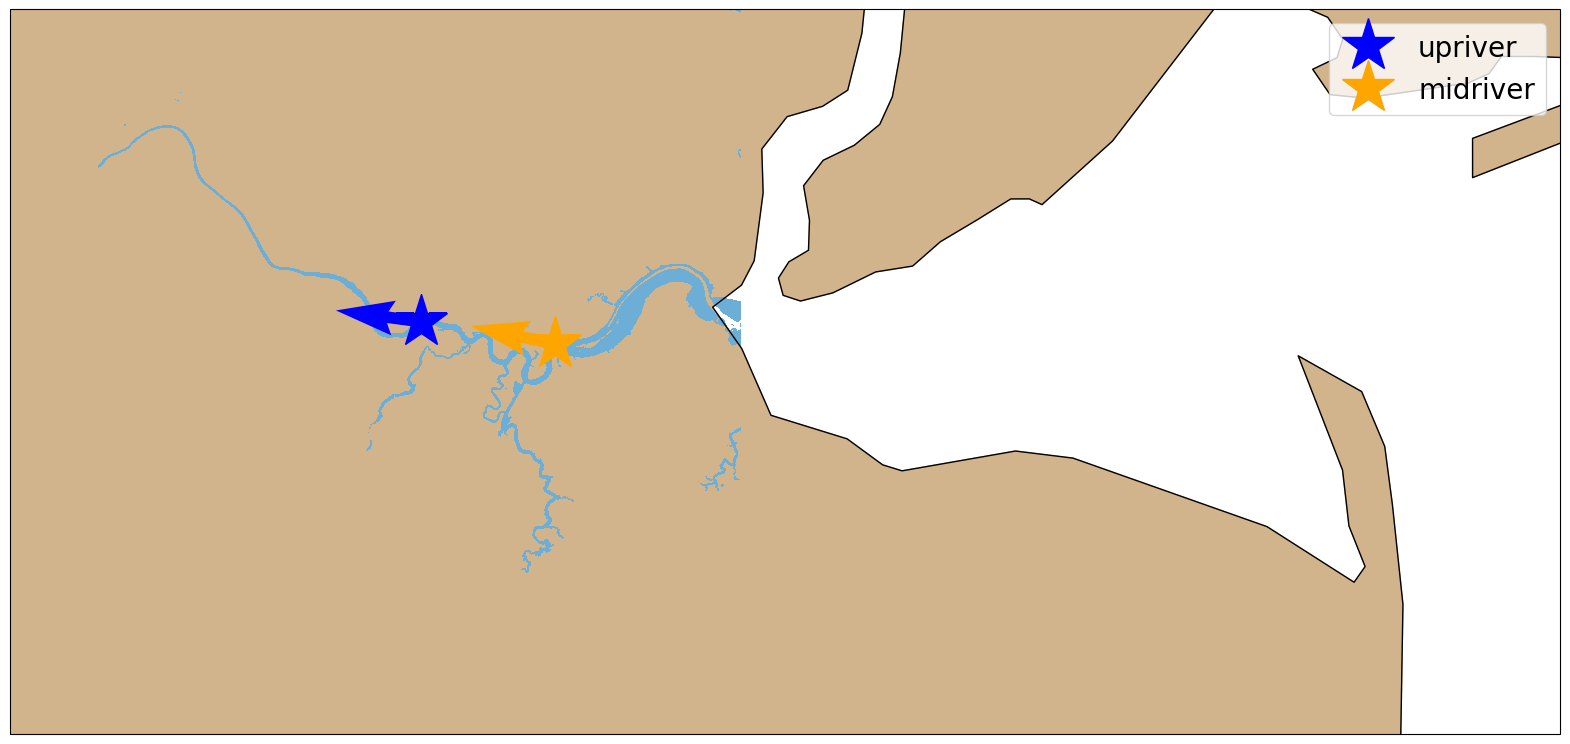

In [63]:
plt.figure(figsize=(20,10))
# 'Mercator' represents lat and lon on a more realistic globe
proj = ccrs.Mercator()
# PlateCarree is the projection that your xarray is currently on
data_crs = ccrs.PlateCarree()
# create plot with the 'Mercator' projection
ax = plt.subplot(projection = proj)

## We're just plotting ONE of the latitude and longitude points because this example is from when the boat was stationary
plt.plot(upriver.lon[0], upriver.lat[0], '*',transform = data_crs,markersize=40,label='upriver',color='blue') # need to "transform" data from PlateCaree to Mercator
plt.plot(midriver.lon[0], midriver.lat[0], '*',transform = data_crs,markersize=40,label='midriver',color='orange') # need to "transform" data from PlateCaree to Mercator

plt.xticks(rotation=45)

ax.coastlines()
ax.add_feature( cfeature.LAND, color='tan' )

## Zoom in!
ax.set_extent([-74.6, -73.9, 40.35, 40.6])
plt.legend()
plt.rc('legend',fontsize=30) # using a size in points

dpth_contours = [-5,0]
bathy = plt.contourf(raritan.longitude, raritan.latitude,raritan.z.transpose(),transform=ccrs.PlateCarree(), 
                     cmap='Blues_r', levels=dpth_contours,zorder=0)

## To plot one arrow, we need to make our
## lon, lat, u, and v inputs 2D
x,y = np.meshgrid(upriver.lon[0].values,upriver.lat[0].values)
u,v=np.meshgrid(da_u_upriver,da_v_upriver)
plt.quiver(x,y,u,v,transform=ccrs.PlateCarree(),color='blue', scale_units='inches')


## To plot one arrow, we need to make our
## lon, lat, u, and v inputs 2D
x,y = np.meshgrid(midriver.lon[0].values,midriver.lat[0].values)
u,v=np.meshgrid(da_u_midriver,da_v_midriver)
plt.quiver(x,y,u,v,transform=ccrs.PlateCarree(),color='orange', scale_units='inches')


## **Assignment:**  Now it is your turn to make some plots
<br>
Above we made some plots of the two stations in the Raritan River. For this assignment, you are tasked with making similar plots with the "rivermouth" and "baymouth" stations. With these other datasets, do the following:<br><br>

1) Make a map showing where all of the stations were conducted. Remember, there are many latitude and longitude points in each dataset but we only want to plot one of these points because the ship was essentially stationary during these deployments. Color the rivermouth data green and the baymouth data red<br>
2) Calculate a mean velocity depth profile for the rivermouth and baymouth stations<br>
3) Make plots of these mean velocity profiles. Make sure your plots have the correct labels and all the data is clear! <br>
4) Describe if/how current changes between the stations. <br>
5) Now make a map that has each station and the depth averaged current for the station in the respective station color. <br>
6) At what station do the maximum and minimum for the E-W depth averaged current occur? How about the N-S maximum and minimum? <br>
